<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/Clock_20221104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate
 
#const.
# degradation rates for nuclear proteins and nuclear protein complexes
    
dx1=0.08;  # degradation rate for CLOCK/BMAL
dx2=0.06;  # degradation rate for PER/CRYn
dx3=0.09;  # degradation rate for PER/CRYn
dx5=0.17;  # degradation rate for REV-ERB
dx6=0.12;  # degradation rate for RORn
dx7=0.15;  # degradation rate for BMALn
 

   # degradation rates for mRNAs 
   
dy1=0.3;   # degradation rate for Per
dy2=0.2;   # degradation rate for Cry
dy3=2;     # degradation rate for Rev-Erb
dy4=0.2;   # degradation rate for Ror
dy5=1.6;   # degradation rate for Bmal


   # degradation rates for cytoplasmic proteins and cytoplasmic protein complexes 
  
dz1=0.23;  # degradation rate for CRY 
dz2=0.25;  # degradation rate for PER 
dz3=0.6;   # degradation rate for PER*
dz4=0.2;   # degradation rate for PER*/CRYc
dz5=0.2;   # degradation rate for PER/CRYc
dz6=0.31;  # degradation rate for REV-ERB
dz7=0.3;   # degradation rate for RORc
dz8=0.73;  # degradation rate for BMALc 


  # reaction rates for complex formation/dissociation
  
kfx1=2.3;  # complex formation rate for CLOCK/BMAL
kdx1=0.01; # complex dissociation rate for CLOCK/BMAL

kfz4=1;    # complex formation rate for PER*/CRY
kfz5=1;    # complex formation rate for PER/CRY

kdz5=1;    # complex dissociation rate for PER/CRY
kdz4=1;    # complex dissociation rate for PER*/CRY


  # phosphorylation rates 

kfz2=2;     # phosphorylation rate constant for PER  
kdfz3=0.05; # dephosphorylation rate constant for PER*


  # transcription rates
  
V1max=1;     # maximal rate of Per transcription
V2max=2.92;  # maximal rate of Cry transcription
V3max=1.90;  # maximal rate of Rev-Erb transcription
V4max=10.90; # maximal rate of Ror transcription
V5max=1;     # maximal rate of Bmal transcription

kt1=3;    # rate constant of Per transcription
kt2=2.4;  # rate constant of Cry transcription
kt3=2.07; # rate constant of Rev-Erb transcription
kt4=0.9;  # rate constant of Ror transcription
kt5=8.35; # rate constant of Bmal transcription

ki1=0.9;  # inhibition constant of Per transcription
ki2=0.7;  # inhibition constant of Cry transcription
ki21=5.2; # inhibition constant of Cry transcription by REV-ERB
ki3=3.3;  # inhibition constant of Rev-Erb transcription
ki4=0.4;  # inhibition constant of Ror transcription
ki5=1.94; # inhibition constant of Bmal transcription


   # translation rates
    
kp1=0.4;    # production rate of PER  
kp2=0.26;  # production rate of CRY
kp3=0.37;   # production rate of REV-ERB 
kp4=0.76;   # production rate of ROR
kp5=1.21;   # production rate of BMAL

   # import/export rates
    
kiz4=0.2;  # import rate of  PER*/CRY to the nucleus
kiz5=0.1;  # import rate of  PER/CRY to the nucleus
kiz6=0.5;  # import rate of REV-ERB to the nucleus
kiz7=0.1;  # import rate of ROR to the nucleus
kiz8=0.1;  # import rate of BMAL to the nucleus

kex2=0.02; # export rate of  PER*/CRY to the cytoplasm
kex3=0.01; # export rate of  PER/CRY to the cytoplasm


   #fold activation of transcription
 
a=12; # fold activation of Per transcription
d=12; # fold activation of Cry transcription
g=5;  # fold activation of Rev-Erb transcription 
h=5;  # fold activation of Ror transcription
i=12; # fold activation of Bmal transcription


  # Hill coefficients of transcription

b=5;   # Hill coefficient of activation of Per transcription
c=7;   # Hill coefficient of inhibition of Per transcription

e=6;   # Hill coefficient of activation of Cry transcription
f=4;   # Hill coefficient of inhibition of Cry transcription
f1=1;  # Hill coefficient of inhibition of Cry transcription via REV

v=6;   # Hill coefficient of activation of Rev-Erb  transcription
w=2;   # Hill coefficient of inhibition of Rev-Erb  transcription

p=6;   # Hill coefficient of activation of Ror transcription
q=3;   # Hill coefficient of inhibition of Ror transcription

n=2;   # Hill coefficient of activation of Bmal transcription
m=5;   # Hill coefficient of inhibition of Bmal transcription


a2=1; # weight factor for PER*/CRY
a3=1; # weight factor for PER/CRY

Rev0=0;  #simulating a constitutively expressed Rev-Erb with the given value
Ror0=0;  #simulating a constitutively expressed Ror with the given value
Bmal0=0; #simulating a constitutively expressed Bmal with the given value
Per0=0;  #simulating a constitutively expressed Per with the given value
Cry0=0;  #simulating a constitutively expressed Cry with the given value

 
dt = 0.01
t = np.arange(0.0, 50.0, dt) #The time to integrate over 
len_t = len(t) 
timestep = 20 #timestep
 
X0=(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)

In [13]:
#ODEs
def dALLdt(X, t):

    [x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18] = X

    d0dt = (kfx1 * x9 - kdx1 * x0 - dx1 * x0)   # CLOCK/BMAL
    d1dt = (V3max * (1 + g * ((x0 / kt3) ** v)) / (1 + ((PC / ki3) ** w) * ((x0 / kt3) ** v) + (x0 / kt3) ** v ) - dy3 * x1)   # transcription of Rev-erb
    d2dt = (V4max * (1 + h * ((x0 / kt4) ** p)) / (1 + ((PC / ki4) ** q) * ((x0 / kt4) ** p) + (x0 / kt4) ** p ) - dy4 * x2);   # transcription of Ror
    d3dt = (kp3 *(x1 + Rev0) - kiz6 * x3 - dz6 * x3)   # production of REV-ERB 
    d4dt = (kp4 *(x2 + Ror0) - kiz7 * x4 - dz7 * x4)   # production of ROR
    d5dt = (kiz6 * x3 - dx5 * x5)   # nuclear REV-ERB 
    d6dt = (kiz7 * x4 - dx6 * x6)   # nuclear ROR
    d7dt = (V5max * (1 + i * ((x6 / kt5) ** n)) / (1 + (x5 / ki5) ** m + (x6 / kt5) ** n ) - dy5 * x7) # transcription of Bmal
    d8dt = (kp5 * (x7 + Bmal0) - kiz8 * x8 - dz8 * x8)   # production of BMAL
    d9dt = (kiz8 * x8 + kdx1 * x0 -  kfx1 * x9 - dx7 * x9)   # nuclear BMAL
    d10dt = (V1max * (1 + a * ((x0 / kt1) ** b))  / (1 + ((PC / ki1) ** c) * ((x0 / kt1 ) ** b)  + (x0 / kt1 ) ** b) - dy1 * x10) # transcription of Per
    d11dt = ((V2max * (1 + d * ((x0 / kt2) ** e))  / (1 + ((PC / ki2) ** f)*((x0 / kt2 ) ** e)  + (x0 / kt2 ) ** e)) * (1 / (1 + (x5 / ki21) ** f1)) - dy2 * x11) # transcription of Cry
    d12dt = (kp2 * (x11 + Cry0)  + kdz4 * x15 + kdz5 * x16 - kfz5 * x12 * x13 - kfz4 * x12 * x14 - dz1 * x12) # production of CRY 
    d13dt = (kp1 * (x10 + Per0)  + kdz5 * x16  + kdfz3 * x14 - kfz5 * x13 * x12 - kfz2 * x13 - dz2 * x13) # production of PER 
    d14dt = (kfz2 * x13 + kdz4 * x15 - kdfz3 * x14 - kfz4 * x14 * x12  - dz3 * x14) # phosphorylation of PER 
    d15dt = (kfz4 * x12 * x14 + kex2 * x17 - kiz4 * x15 - kdz4 * x15 - dz4 * x15)  # complex formation-PER*/CRY -cytoplasm
    d16dt = (kfz5 * x12 * x13 + kex3 * x18 - kiz5 * x16 - kdz5 * x16 - dz5 * x16) # complex formation-PER/CRY -cytoplasm
    d17dt = (kiz4 * x15 - kex2 * x17 - dx2 * x17) # nuclear complex-PER*/CRY 
    d18dt = (kiz5 * x16 - kex3 * x18 - dx3 * x18) # nuclear complex-PER/CRY 
    
    def dPCdt(Y, t):

      PC = a2 * x17 + a3 * x18 # pool of nuclear complexes PER/CRY

      return PC

    return d0dt,d1dt,d2dt, d3dt,d4dt, d5dt, d6dt, d7dt,d8dt, d9dt, d10dt, d11dt,d12dt, d13dt, d14dt, d15dt,d16dt, d17dt, d18dt

   
     
    






 

In [14]:
#微分方程式を解く
X = integrate.odeint(dALLdt, X0, t)
     
x0 = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
x3 = X[:,3]
x4 = X[:,4]
x5 = X[:,5]
x6 = X[:,6]
x7 = X[:,7]
x8 = X[:,8]
x9 = X[:,9]
x10 = X[:,10]
x11 = X[:,11]
x12 = X[:,12]
x13 = X[:,13]
x14 = X[:,14]
x15 = X[:,15]
x16 = X[:,16]
x17 = X[:,17]
x18 = X[:,18]
PC = Y[:,0]

NameError: ignored

[3.         3.06546973 3.12930608 ... 1.18831976 1.18821793 1.18811619]


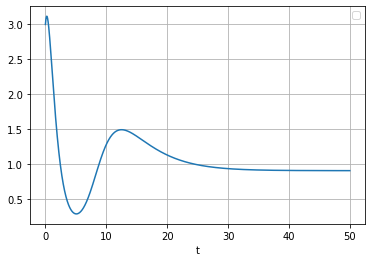

In [ ]:
plt.plot(t,x9)
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
print(x1)
plt.show() #表示